In [2]:
import pandas as pd
df = pd.read_csv('CreditCardFraud.csv')
df.shape

(786363, 29)

In [3]:
missing_NA1 = df.isna().sum()
missing_NA1

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [4]:
missing_cols = df.columns[df.isna().all()]
missing_cols

Index(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip',
       'posOnPremises', 'recurringAuthInd'],
      dtype='object')

In [332]:
df_now = df.drop(missing_cols, axis=1)
df_now = df_now.drop(["accountNumber"],axis=1)

In [333]:
df_now.shape

(786363, 22)

In [10]:
# the first two cols are the same
sum(df.iloc[:,0] == df.iloc[:,1])

786363

In [11]:
# accountOpenDate	dateOfLastAddressChange are not the same
sum(df.iloc[:,13] == df.iloc[:,14])

373076

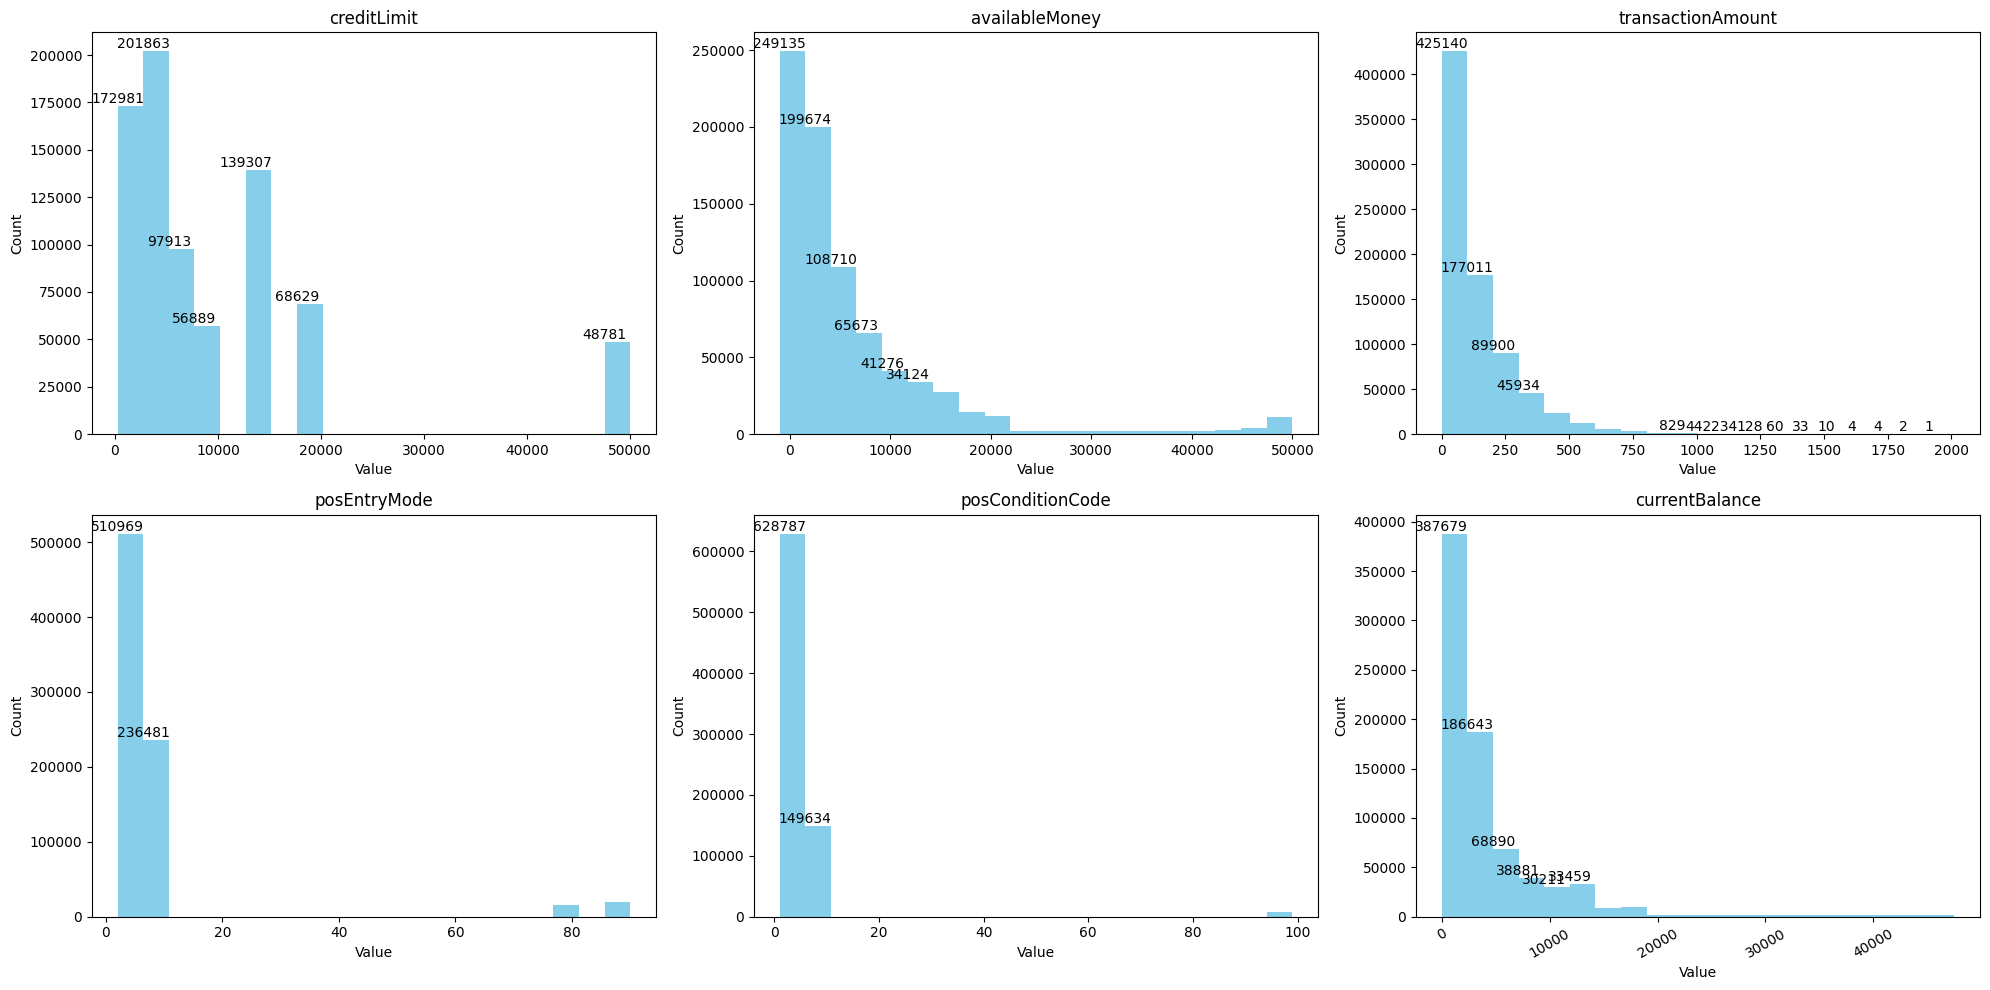

In [246]:
numeric_vars = [ 'creditLimit', 'availableMoney', 'transactionAmount', 'posEntryMode', 'posConditionCode', 'currentBalance']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
#fig.patch.set_facecolor('green')
for ax, col in zip(axes.flatten(), numeric_vars):
    #counts, bins, patches = ax.hist(df_now[col], bins=40 ,color="skyblue")
    counts, bins, patches = ax.hist(df_now[col], bins=20 ,color="skyblue")
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    plt.xticks(rotation=30)
    for count, x, patch in zip(counts, bins[:-1], patches):
        if count > 30000:
            ax.text(x, count, int(count), ha='center', va='bottom')
        elif count < 1000 and count>0:
            ax.text(x, count, int(count), ha='center', va='bottom')
plt.tight_layout()
plt.show()

First I find out all the numeric variables in the current dataset(With dupulicated and entirely null columns deleted). And the numeric variables include `customerId`, `creditLimit`, `availableMoney`, `transactionAmount`, `posEntryMode`, `posConditionCode`, `cardCVV`, `enteredCVV`, `cardLast4Digits` and `currentBalance`

Then I draw each of those's historgram plot try to identify outliers.

- customerId: This is just a unique identifier for the customer associated with the transaction and it seems normal

- creditLimit : This variable represents the maximum credit limit that the customer has on their account. While the value of 50000 appears to be an outlier based on the plot, it is possible that in real life, the next level of credit limit beyond 20000 would likely be set at 50000.

- availableMoney: This variable represents the amount of credit available to the customer at the time of the transaction. From the plot there might exist some outliers, but considering the creditLimit, I think I only need to remove the value that is less than 0.

- posEntryMode: the method used by the customer to enter their payment card information during the transaction. There are some outliers also with value too different then the origin value.

- posConditionCode: the condition of the point-of-sale terminal at the time of the transaction. There are some outliers also.

- currentBalance: 

After all the analysis, I plan to remove all the outliers.

In [334]:
df_now = df_now[df_now['availableMoney'] >= 1]
df_now = df_now[df_now['transactionAmount'] >= 0]
df_now = df_now[df_now['posEntryMode'] <= 60]
df_now = df_now[df_now['posConditionCode'] <= 60]
df_now = df_now[df_now['currentBalance'] <= 20000]

In [335]:
df_now.shape

(717291, 22)

In [ ]:
pd.isna(df_now)
df_now.mean()
df_now["currentBalance"].describe()
df_now["expirationDateKeyInMatch"].describe()
df_now["merchantName"].describe()
df_now["cardLast4Digits"].describe()

In [336]:
##fill
df_now = df_now.fillna("Missing")
##frop

In [337]:
df_now.shape

(717291, 22)

In [359]:
Missing1 = df_now.isna().sum()
Missing1

customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
day_of_week                 0
CVVMatched                  0
Matched_CVV                 0
dtype: int64

In [114]:
df_now['Actual_length_cardLast4Digits'] = df_now['cardLast4Digits'].apply(lambda x : len(str(x)))
sum(df_now['Actual_length_cardLast4Digits']==4)

610797

In [92]:
sum(df_now['cardCVV'] != df_now['enteredCVV'])

6399

In [ ]:
sum(df_now['Actual_length_cardLast4Digits']==4)/sum(df_now['cardCVV'] != df_now['enteredCVV'])

In [95]:
df_now.drop(df_now[df_now['cardCVV'] != df_now['enteredCVV']].index, inplace=True)

df_now.drop(df_now[df_now['Actual_length_cardLast4Digits']==3].index, inplace=True)

df_now

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,cardLast4Digits_isreal?
0,737265056,5000.0,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,...,414,414,1803,PURCHASE,0.00,False,False,False,Saturday,4
4,830329091,5000.0,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,885,885,3143,PURCHASE,0.00,True,False,False,Thursday,4
5,830329091,5000.0,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,2.0,1.0,...,885,885,3143,PURCHASE,0.00,True,False,False,Tuesday,4
6,830329091,5000.0,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,2.0,1.0,...,885,885,3143,PURCHASE,0.00,True,False,False,Saturday,4
7,830329091,5000.0,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,5.0,1.0,...,885,885,3143,PURCHASE,0.00,True,False,False,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786356,732852505,50000.0,49365.27,2016-12-19T03:25:53,408.83,Lyft,US,US,9.0,1.0,...,939,939,3388,PURCHASE,634.73,False,False,False,Monday,4
786357,732852505,50000.0,48956.44,2016-12-22T07:27:23,51.48,Sunoco Gas #380975,US,US,5.0,8.0,...,936,936,3783,PURCHASE,1043.56,True,False,False,Thursday,4
786359,732852505,50000.0,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,...,939,939,3388,PURCHASE,1214.96,False,False,False,Sunday,4
786360,732852505,50000.0,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,...,936,936,3783,PURCHASE,1233.85,False,False,False,Tuesday,4


In [338]:
import datetime

df_now['day_of_week'] = df_now['transactionDateTime'].apply(lambda x : 
                        datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').strftime("%A"))

df_now["transactionDateTime"] = df_now["transactionDateTime"].astype("datetime64")

df_now["cardLast4Digits"] = [("{:>4}".format(string)).replace(" ", "0") for string in df_now.cardLast4Digits]

df_now["cardCVV"] = [("{:>3}".format(string)).replace(" ", "0") for string in df_now.cardCVV]

df_now["enteredCVV"] = [("{:>3}".format(string)).replace(" ", "0") for string in df_now.enteredCVV]

df_now["CVVMatch"] = (df_now.cardCVV == df_now.enteredCVV)

In [153]:
df_now.head(10)

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,CVVMatched
0,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,...,414,414,1803,PURCHASE,0.0,False,False,False,Saturday,True
1,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,...,486,486,0767,PURCHASE,0.0,True,False,False,Tuesday,True
2,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,...,486,486,0767,PURCHASE,0.0,False,False,False,Tuesday,True
3,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,...,486,486,0767,PURCHASE,0.0,False,False,False,Saturday,True
4,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,885,885,3143,PURCHASE,0.0,True,False,False,Thursday,True


In [342]:
sum(df_now["CVVMatched"]==False)

6442

In [ ]:
sum(df_now["CVVMatched"]==False)/len(df_now)

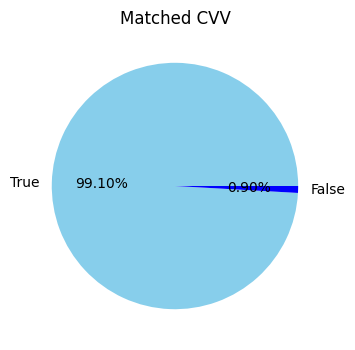

In [354]:
c_cont = df_now['CVVMatched'].value_counts()
labels = ['True', 'False']
sizes_set = [c_cont[0], c_cont[1]]
colors_set=['skyblue', 'blue']
ax.pie(sizes_set, 
       labels=labels, 
       autopct='%1.2f%%', 
       colors=colors_set)
ax.set_title('Matched CVV')
plt.show()

In [206]:
df_now["cardLast4Digits"].max()

'9998'

In [207]:
df_now["cardLast4Digits"].min()

'0000'

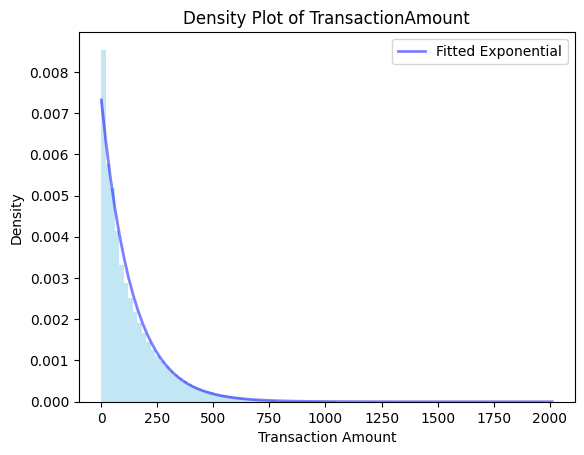

In [319]:
from scipy.stats import expon
plt.hist(df_now['transactionAmount'], density=True, bins=100, alpha=0.5, color='skyblue')
plt.title('Density Plot of TransactionAmount')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
l, s = expon.fit(df_now['transactionAmount'])
x = np.linspace(0, df_now['transactionAmount'].max(), 100)
pdf = expon.pdf(x, l, s)
plt.plot(x, pdf, 'skyblue', lw=3, alpha=0.5, label='Fitted Exponential')
plt.legend()
plt.show()

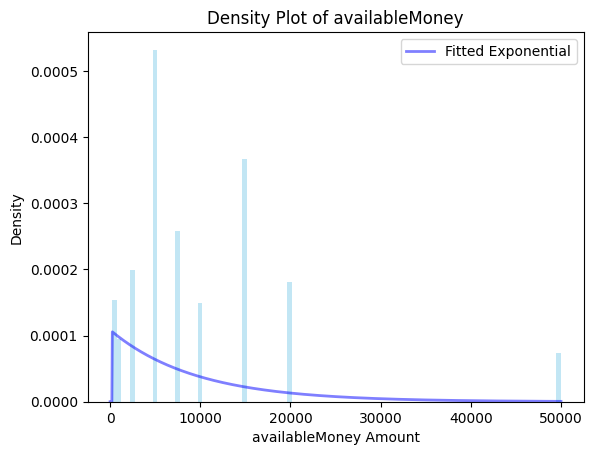

In [325]:
from scipy.stats import expon
plt.hist(df_now['creditLimit'], density=True, bins=100, alpha=0.5, color='skyblue')
plt.title('Density Plot of availableMoney')
plt.xlabel('availableMoney Amount')
plt.ylabel('Density')
l, s = expon.fit(df_now['creditLimit'])
x = np.linspace(0, df_now['availableMoney'].max(), 1000)
pdf = expon.pdf(x, l, s)
plt.plot(x, pdf, 'b-', lw=2, alpha=0.5, label='Fitted Exponential')
plt.legend()
plt.show()

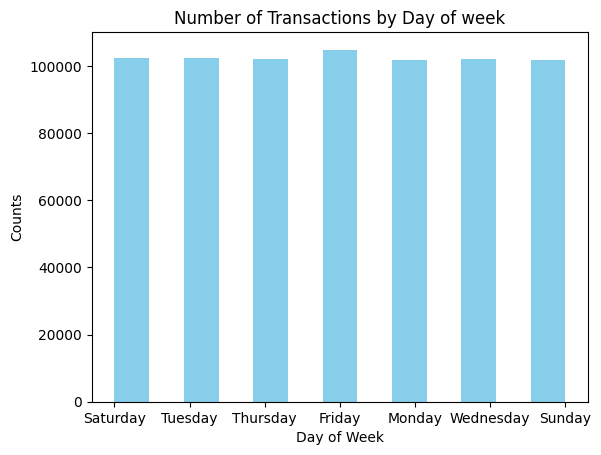

In [229]:
plt.hist(df_now["day_of_week"], color='skyblue', bins = 13)
plt.title("Number of Transactions by Day of week")
plt.xlabel("Day of Week")
plt.ylabel("Counts")
plt.show()

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2855416430.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2855416430.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2855416430.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2855416430.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2855416430.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2855416430.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



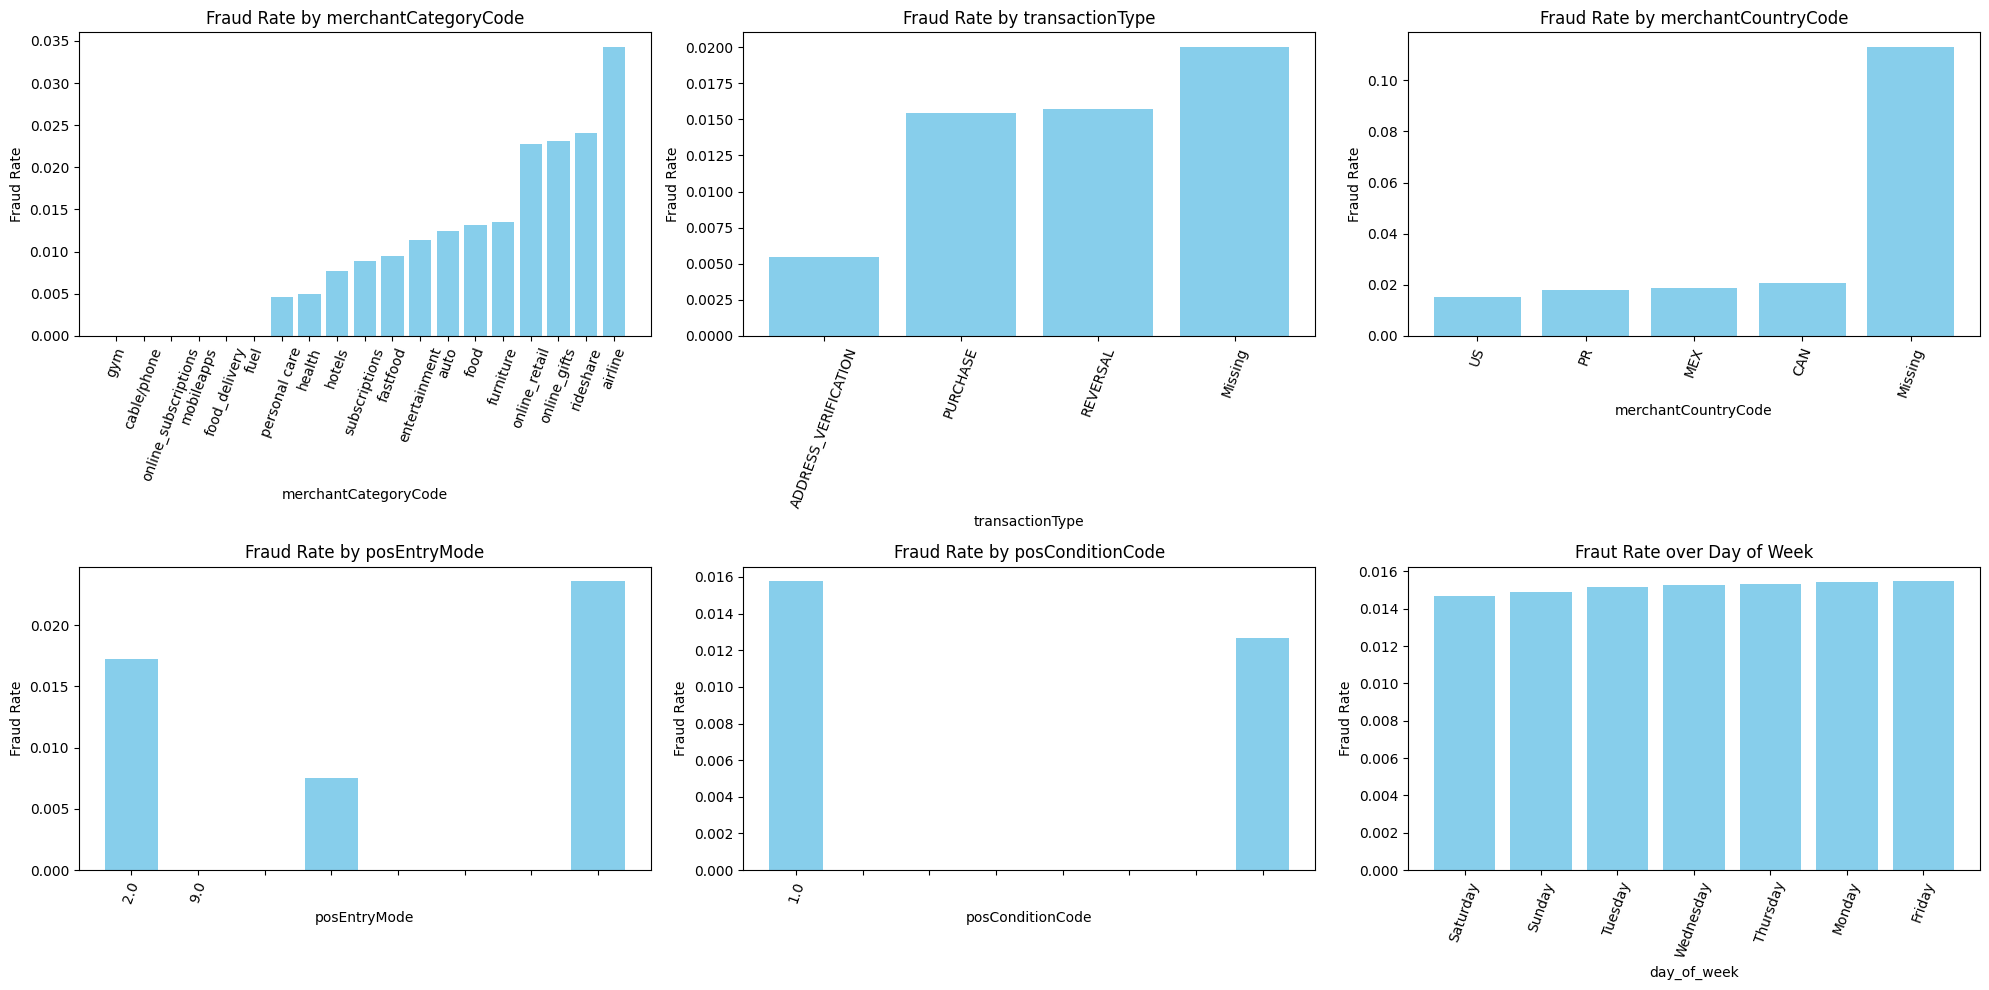

In [230]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()
list1 = ["merchantCategoryCode", "transactionType", "merchantCountryCode","posEntryMode", "posConditionCode","day_of_week"]
list2 = ["posEntryMode", "posConditionCode","day_of_week"]
colors = ["skyblue"]
plt.tight_layout()
for i, Var in enumerate(list1):
    Frate = df_now.groupby(var)['isFraud'].mean().sort_values()
    axs[i].bar(Frate.index, Frate.values, color=colors[0])
    axs[i].set_xticklabels(Frate.index, rotation=70)
    axs[i].set_title(f'Fraud Rate by {Var}')
    axs[i].set_xlabel(f'{Var}')
    axs[i].set_ylabel('Fraud Rate')
    pdf = expon.pdf(x, l, s)
plt.title("Fraud Rate over Day of Week")
plt.show()

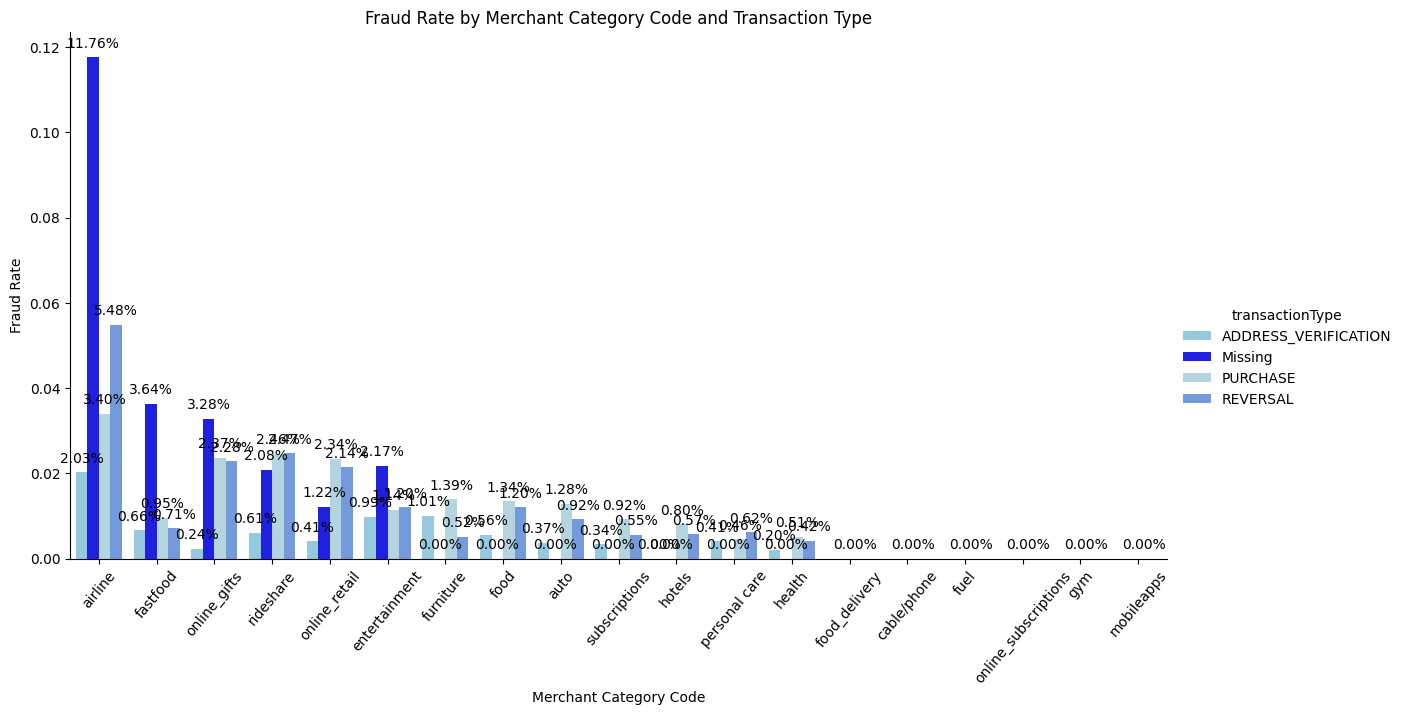

In [170]:
grouped1 = df_now.groupby(['merchantCategoryCode', 'transactionType'])['isFraud'].max().reset_index()
g2 = df_now.groupby(['merchantCategoryCode', 'transactionType'])['isFraud'].mean().reset_index()
order_here = g2.sort_values('isFraud',    ascending=True)['merchantCategoryCode'].unique()
color_SET = ['skyblue', 'blue', 'lightblue', "white"]
ax = sns.catplot(x="merchantCategoryCode", y="isFraud", hue="transactionType", data=g2, kind="bar", height=6, aspect=2, palette=color_SET, order=order_here)
ax.set(xlabel='Merchant Category Code', ylabel='Fraud Rate', title='Fraud Rate by Merchant Category Code and Transaction Type')
plt.xticks(rotation=50)
for p in ax.ax.patches:
    Set = (0, 10)
    ax.ax.annotate(format(p.get_height(), '.3%'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = Set, textcoords = 'offset points')
plt.show()

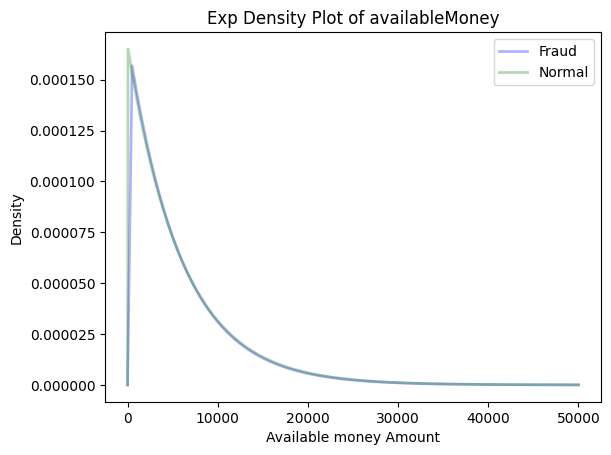

In [378]:
fraud_df = df_now[df_now['isFraud'] == True]
normal_df = df_now[df_now['isFraud'] == False]
#plt.hist(fraud_df['availableMoney'], density=True, bins=500, alpha=0.5, color='skyblue')
#plt.hist(normal_df['availableMoney'], density=True, bins=500, alpha=0.5, color='red')
plt.title('Exp Density Plot of availableMoney')
plt.xlabel('Available money Amount')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['availableMoney'])
loc2, scale2 = expon.fit(normal_df['availableMoney'])
x1 = np.linspace(0, fraud_df['availableMoney'].max(), 100)
x2 = np.linspace(0, normal_df['availableMoney'].max(), 1000)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'skyblue', lw=2, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g', lw=2, alpha=0.3, label='Normal')
plt.legend()
plt.show()

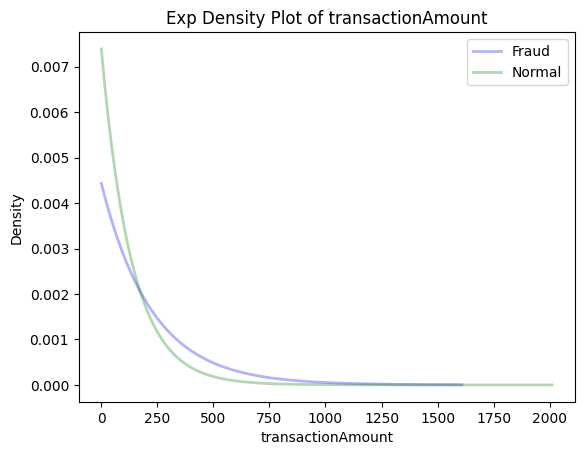

In [379]:
fraud_df = df_now[df_now['isFraud'] == True]
normal_df = df_now[df_now['isFraud'] == False]
#plt.hist(fraud_df['availableMoney'], density=True, bins=500, alpha=0.5, color='skyblue')
#plt.hist(normal_df['availableMoney'], density=True, bins=500, alpha=0.5, color='red')
plt.title('Exp Density Plot of transactionAmount')
plt.xlabel('transactionAmount')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['transactionAmount'])
loc2, scale2 = expon.fit(normal_df['transactionAmount'])
x1 = np.linspace(0, fraud_df['transactionAmount'].max(), 1000)
x2 = np.linspace(0, normal_df['transactionAmount'].max(), 1000)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=2, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.3, label='Normal')
plt.legend()
plt.show()

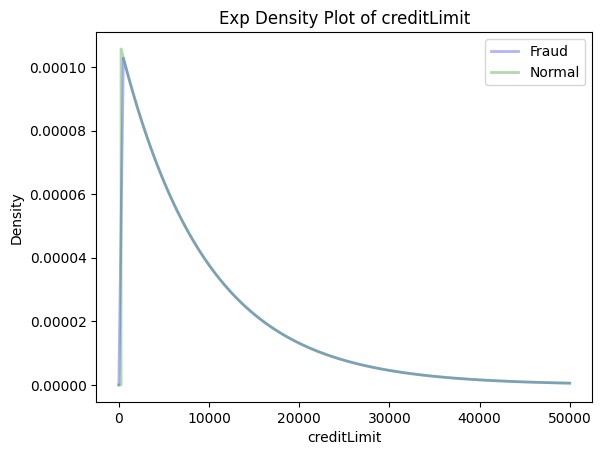

In [387]:
fraud_df = df_now[df_now['isFraud'] == True]
normal_df = df_now[df_now['isFraud'] == False]
#plt.hist(fraud_df['availableMoney'], density=True, bins=500, alpha=0.5, color='skyblue')
#plt.hist(normal_df['availableMoney'], density=True, bins=500, alpha=0.5, color='red')
plt.title('Exp Density Plot of creditLimit')
plt.xlabel('creditLimit')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['creditLimit'])
loc2, scale2 = expon.fit(normal_df['creditLimit'])
x1 = np.linspace(0, fraud_df['creditLimit'].max(), 100)
x2 = np.linspace(0, normal_df['creditLimit'].max(), 10000)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=2, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.3, label='Normal')
plt.legend()
plt.show()

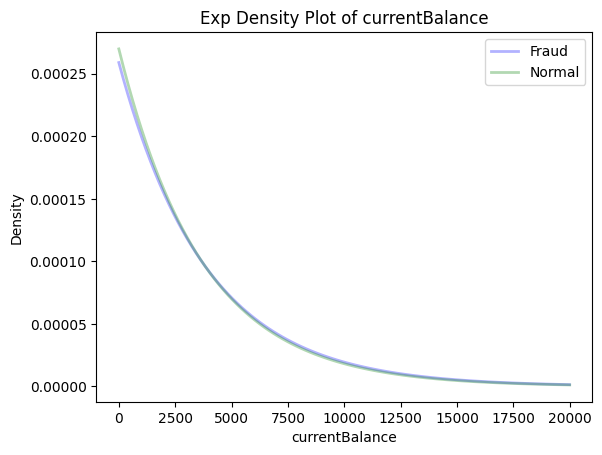

In [388]:
from scipy.stats import expon
fraud_df = df_now[df_now['isFraud'] == True]
normal_df = df_now[df_now['isFraud'] == False]
#plt.hist(fraud_df['availableMoney'], density=True, bins=500, alpha=0.5, color='skyblue')
#plt.hist(normal_df['availableMoney'], density=True, bins=500, alpha=0.5, color='red')
plt.title('Exp Density Plot of currentBalance')
plt.xlabel('currentBalance')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['currentBalance'])
loc2, scale2 = expon.fit(normal_df['currentBalance'])
x1 = np.linspace(0, fraud_df['currentBalance'].max(), 100)
x2 = np.linspace(0, normal_df['currentBalance'].max(), 100)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=2, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.3, label='Normal')
plt.legend()
plt.show()

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2920547405.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2920547405.py:23: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2920547405.py:37: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_1006/2920547405.py:51: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call a

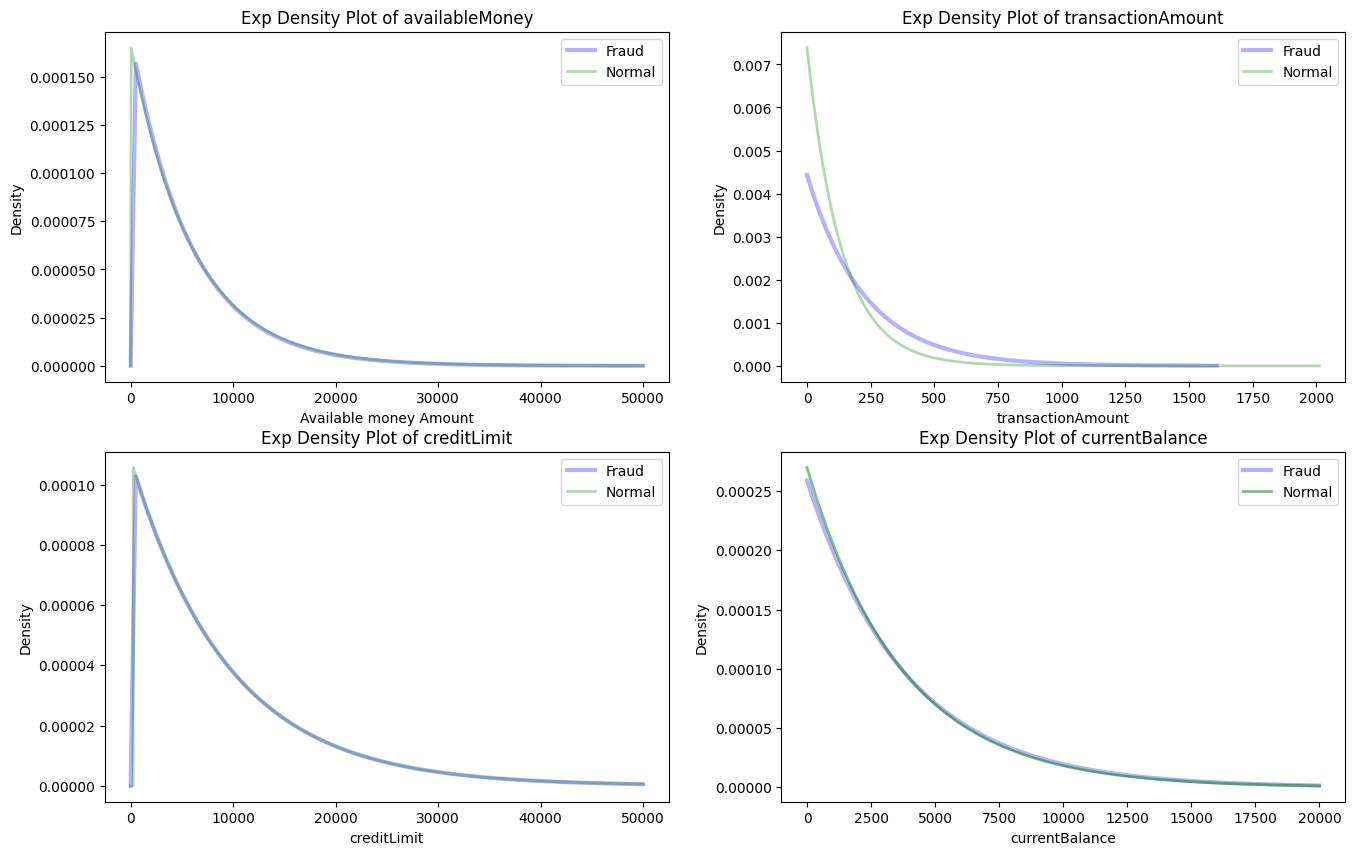

In [397]:
fraud_df = df_now[df_now['isFraud'] == True]
normal_df = df_now[df_now['isFraud'] == False]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))


plt.subplot(2, 2, 1)
plt.title('Exp Density Plot of availableMoney')
plt.xlabel('Available money Amount')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['availableMoney'])
loc2, scale2 = expon.fit(normal_df['availableMoney'])
x1 = np.linspace(0, fraud_df['availableMoney'].max(), 100)
x2 = np.linspace(0, normal_df['availableMoney'].max(), 1000)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=3, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.3, label='Normal')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Exp Density Plot of transactionAmount')
plt.xlabel('transactionAmount')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['transactionAmount'])
loc2, scale2 = expon.fit(normal_df['transactionAmount'])
x1 = np.linspace(0, fraud_df['transactionAmount'].max(), 1000)
x2 = np.linspace(0, normal_df['transactionAmount'].max(), 1000)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=3, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.3, label='Normal')
plt.legend()

plt.subplot(2, 2, 3)
plt.title('Exp Density Plot of creditLimit')
plt.xlabel('creditLimit')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['creditLimit'])
loc2, scale2 = expon.fit(normal_df['creditLimit'])
x1 = np.linspace(0, fraud_df['creditLimit'].max(), 100)
x2 = np.linspace(0, normal_df['creditLimit'].max(), 10000)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=3, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.3, label='Normal')
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Exp Density Plot of currentBalance')
plt.xlabel('currentBalance')
plt.ylabel('Density')
loc1, scale1 = expon.fit(fraud_df['currentBalance'])
loc2, scale2 = expon.fit(normal_df['currentBalance'])
x1 = np.linspace(0, fraud_df['currentBalance'].max(), 100)
x2 = np.linspace(0, normal_df['currentBalance'].max(), 100)
pdf1 = expon.pdf(x1, loc=loc1, scale=scale1)
pdf2 = expon.pdf(x2, loc=loc2, scale=scale2)
plt.plot(x1, pdf1, 'b-', lw=3, alpha=0.3, label='Fraud')
plt.plot(x2, pdf2, 'g-', lw=2, alpha=0.5, label='Normal')
plt.legend()

In [265]:
Df_Cut = df_now.loc[:, ["isFraud", "transactionAmount", "transactionDateTime"]]
Df_Cut["transactionDateTime"] = Df_Cut["transactionDateTime"].astype("datetime64")
time_span = pd.Timedelta(minutes=10) 
grouped = Df_Cut.groupby([pd.Grouper(key='transactionDateTime', freq=time_span), 'transactionAmount',"isFraud"])

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_56206/2145454275.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  Df_Cut["transactionDateTime"] = Df_Cut["transactionDateTime"].astype("datetime64")


In [255]:
A = pd.DataFrame(grouped)[0]
A

0            (2016-01-01 00:00:00, 0.0, False)
1           (2016-01-01 00:00:00, 20.45, True)
2          (2016-01-01 00:00:00, 24.56, False)
3          (2016-01-01 00:00:00, 42.61, False)
4          (2016-01-01 00:00:00, 44.09, False)
                          ...                 
761363    (2016-12-30 23:50:00, 169.07, False)
761364    (2016-12-30 23:50:00, 241.04, False)
761365    (2016-12-30 23:50:00, 337.05, False)
761366    (2016-12-30 23:50:00, 477.76, False)
761367    (2016-12-30 23:50:00, 568.95, False)
Name: 0, Length: 761368, dtype: object

In [268]:
grouped.transactionAmount.count().index

MultiIndex([('2016-01-01 00:00:00',    0.0, False),
            ('2016-01-01 00:00:00',  20.45,  True),
            ('2016-01-01 00:00:00',  24.56, False),
            ('2016-01-01 00:00:00',  42.61, False),
            ('2016-01-01 00:00:00',  44.09, False),
            ('2016-01-01 00:00:00',  44.73, False),
            ('2016-01-01 00:00:00',  90.06, False),
            ('2016-01-01 00:00:00',  96.68, False),
            ('2016-01-01 00:00:00', 122.83, False),
            ('2016-01-01 00:00:00', 146.57, False),
            ...
            ('2016-12-30 23:50:00',  13.02, False),
            ('2016-12-30 23:50:00',  37.43, False),
            ('2016-12-30 23:50:00',  79.66, False),
            ('2016-12-30 23:50:00', 128.84, False),
            ('2016-12-30 23:50:00', 136.15, False),
            ('2016-12-30 23:50:00', 169.07, False),
            ('2016-12-30 23:50:00', 241.04, False),
            ('2016-12-30 23:50:00', 337.05, False),
            ('2016-12-30 23:50:00', 477.76, Fals

In [270]:
amount,fraud,time = [],[],[] 
for INdex, Row in grouped.iterrows():
    if Row['transactionAmount'] != 1:
        time += [Row['merchantCategoryCode']] * Row['transactionAmount']
        amount += [Row['transactionType']] * Row['transactionAmount']
        fraud += [Row['isFraud']] * Row['transactionAmount']

In [ ]:
for i in range(10):
    for INdex, Row in grouped.iterrows():
        print("INdex")

In [ ]:
for i in range(10):
    for INdex, Row in grouped.iterrows():
        print("Row")
pd.dateFrame(Row)

In [293]:
minidat = pd.DataFrame({"Amount": amount, "Time": time, "fraud":fraud})
minidat["Time"] = minidat["Time"].astype("datetime64")
minidat.head(20)

/var/folders/gg/22txs7kn6095ndb0pfmd0zcm0000gn/T/ipykernel_56206/3251427059.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  minidat["Time"] = minidat["Time"].astype("datetime64")


,Amount,Time,fraud
0,58.17,2016-01-01 01:00:00,False
1,58.17,2016-01-01 01:00:00,False
2,0.00,2016-01-01 01:50:00,False
3,0.00,2016-01-01 01:50:00,False
4,3.32,2016-01-01 01:50:00,False
5,3.32,2016-01-01 01:50:00,False
6,3.70,2016-01-01 01:50:00,False
7,3.70,2016-01-01 01:50:00,False
8,0.00,2016-01-01 03:50:00,False
9,0.00,2016-01-01 03:50:00,False


In [294]:
len(minidat)

26467

In [291]:
a = 0
for i in range(len(minidat)-1):
    if (minidat["Amount"][i] == minidat["Amount"][i+1]) and (minidat["Time"][i] == minidat["Time"][i+1]):
        if (minidat["Amount"][i] == False and minidat["Amount"][i+1] == True):
            a+=1
        if (minidat["Amount"][i] == True and minidat["Amount"][i+1] == True):
print(a)

0

In [248]:
sum(minidat["fraud"]== True)/len(minidat["fraud"])

0.017241659424944271


In [277]:
sum(df_now["isFraud"]== True)/len(df_now["isFraud"])

0.01506415564656709

In [258]:
df_now["time_diff"] = (df_now.sort_values(["transactionDateTime"])).groupby(["customerId"])["transactionDateTime"].diff()
df_now.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,CVVMatched,time_diff
0,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,...,414,1803,PURCHASE,0.0,False,False,False,Saturday,True,NaT
1,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,...,486,0767,PURCHASE,0.0,True,False,False,Tuesday,True,58 days 14:38:22
2,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,...,486,0767,PURCHASE,0.0,False,False,False,Tuesday,True,28 days 04:12:45
3,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,...,486,0767,PURCHASE,0.0,False,False,False,Saturday,True,31 days 16:56:11
4,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,885,3143,PURCHASE,0.0,True,False,False,Thursday,True,NaT


In [259]:
df_now["time_diff"] = df_now["time_diff"].dt.total_seconds()/60

df_now.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,CVVMatched,time_diff
0,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,...,414,1803,PURCHASE,0.0,False,False,False,Saturday,True,NaN
1,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,...,486,0767,PURCHASE,0.0,True,False,False,Tuesday,True,84398.366667
2,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,...,486,0767,PURCHASE,0.0,False,False,False,Tuesday,True,40572.750000
3,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,...,486,0767,PURCHASE,0.0,False,False,False,Saturday,True,45656.183333
4,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,885,3143,PURCHASE,0.0,True,False,False,Thursday,True,NaN


In [261]:
df_now["money_diff"] = df_now.groupby(["customerId"])["transactionAmount"].diff()

df_now.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,CVVMatched,time_diff,money_diff
0,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,2.0,1.0,...,1803,PURCHASE,0.0,False,False,False,Saturday,True,NaN,NaN
1,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,9.0,1.0,...,0767,PURCHASE,0.0,True,False,False,Tuesday,True,84398.366667,-24.04
2,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,9.0,1.0,...,0767,PURCHASE,0.0,False,False,False,Tuesday,True,40572.750000,-67.04
3,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,9.0,1.0,...,0767,PURCHASE,0.0,False,False,False,Saturday,True,45656.183333,0.00
4,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,...,3143,PURCHASE,0.0,True,False,False,Thursday,True,NaN,NaN


In [ ]:
df_multi.shape()

In [293]:
df_multi = df_now[df_now["time_diff"] < 10]
df_multi

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,CVVMatched,time_diff,money_diff
39,574788567,2500.0,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,9.0,1.0,...,8522,REVERSAL,299.02,True,False,False,Tuesday,True,2.500000,0.00
133,984504651,50000.0,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,5.0,1.0,...,8332,REVERSAL,3632.59,False,False,False,Saturday,True,0.750000,0.00
200,984504651,50000.0,36452.49,2016-02-12 05:10:49,34.92,Golds Gym #747443,US,US,9.0,1.0,...,8332,REVERSAL,13547.51,False,False,False,Friday,True,2.433333,0.00
800,984504651,50000.0,39357.81,2016-10-25 23:47:39,16.60,Walgreens #839009,US,US,2.0,1.0,...,8332,REVERSAL,10642.19,False,False,False,Tuesday,True,5.133333,-11.14
856,984504651,50000.0,31335.55,2016-11-16 09:14:27,16.76,Uber,US,US,2.0,1.0,...,8332,REVERSAL,18664.45,False,False,False,Wednesday,True,2.833333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785984,205026043,5000.0,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,9.0,8.0,...,3931,PURCHASE,4566.48,False,False,False,Tuesday,True,1.766667,0.00
786014,205026043,5000.0,1571.26,2016-09-18 06:08:02,56.26,Lyft,US,US,5.0,1.0,...,0258,REVERSAL,3428.74,False,False,False,Sunday,True,0.750000,0.00
786024,205026043,5000.0,692.68,2016-11-02 22:44:38,67.48,Arbys #384282,US,US,9.0,1.0,...,3931,REVERSAL,4307.32,True,False,False,Wednesday,True,0.683333,-91.22
786120,638498773,10000.0,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,5.0,1.0,...,0321,REVERSAL,201.79,True,False,False,Friday,True,2.266667,0.00


In [294]:
df_multi = df_multi[df_multi["money_diff"] == 0]
df_multi.sort_values(["customerId"])
df_multi

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,day_of_week,CVVMatched,time_diff,money_diff
39,574788567,2500.0,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,9.0,1.0,...,8522,REVERSAL,299.02,True,False,False,Tuesday,True,2.500000,0.0
133,984504651,50000.0,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,5.0,1.0,...,8332,REVERSAL,3632.59,False,False,False,Saturday,True,0.750000,0.0
200,984504651,50000.0,36452.49,2016-02-12 05:10:49,34.92,Golds Gym #747443,US,US,9.0,1.0,...,8332,REVERSAL,13547.51,False,False,False,Friday,True,2.433333,0.0
856,984504651,50000.0,31335.55,2016-11-16 09:14:27,16.76,Uber,US,US,2.0,1.0,...,8332,REVERSAL,18664.45,False,False,False,Wednesday,True,2.833333,0.0
986,114896048,15000.0,12044.08,2016-01-14 06:44:37,37.19,Lyft,US,US,9.0,1.0,...,8915,PURCHASE,2955.92,False,False,False,Thursday,True,1.116667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785983,205026043,5000.0,451.59,2016-06-07 22:29:11,391.94,Uber,US,US,9.0,8.0,...,3931,PURCHASE,4548.41,False,False,False,Tuesday,True,1.600000,0.0
785984,205026043,5000.0,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,9.0,8.0,...,3931,PURCHASE,4566.48,False,False,False,Tuesday,True,1.766667,0.0
786014,205026043,5000.0,1571.26,2016-09-18 06:08:02,56.26,Lyft,US,US,5.0,1.0,...,0258,REVERSAL,3428.74,False,False,False,Sunday,True,0.750000,0.0
786120,638498773,10000.0,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,5.0,1.0,...,0321,REVERSAL,201.79,True,False,False,Friday,True,2.266667,0.0


In [ ]:
df_multi["time_diff"].describe()

In [5]:
sum(df_multi["isFraud"]==True)/len(df_multi)

0.017891891891891894

In [302]:
df_multi2 = df_multi[["customerId","time_diff","transactionDateTime","money_diff","transactionAmount","isFraud"]]

df_multi2[df_multi2["isFraud"]==True].head(10)

,customerId,time_diff,transactionDateTime,money_diff,transactionAmount,isFraud
2014,863358589,2.116667,2016-09-08 00:35:27,0.0,72.83,True
2015,863358589,1.416667,2016-09-08 00:36:52,0.0,72.83,True
2169,717666470,1.566667,2016-01-21 15:18:47,0.0,572.76,True
11605,869838014,0.033333,2016-07-05 20:16:58,0.0,310.33,True
20952,847747776,2.716667,2016-04-21 16:31:05,0.0,205.82,True
21523,835482161,1.350000,2016-01-19 01:06:04,0.0,449.33,True
23500,561697834,2.616667,2016-03-22 02:56:03,0.0,148.06,True
23855,792689804,1.750000,2016-07-28 16:20:19,0.0,329.19,True
32308,613709527,0.166667,2016-08-07 08:25:20,0.0,271.45,True
32606,564602865,1.633333,2016-01-29 09:46:48,0.0,71.80,True


In [ ]:
df_multi2.shape()

In [6]:
a = 0
for i in range(len(df_multi2)-1):
    if (df_multi2["Amount"][i] == df_multi2["Amount"][i+1]) and (df_multi2["Time"][i] == df_multi2["Time"][i+1]):
        if (df_multi2["Amount"][i] == False and df_multi2["Amount"][i+1] == True):
            a+=1
print(a)

0

In [297]:
from imblearn.over_sampling import RandomOverSampler

In [176]:
Entiresample = df_now[["customerId","isFraud"]]
Entiresample

,customerId,isFraud
0,737265056,False
1,737265056,False
2,737265056,False
3,737265056,False
4,830329091,False
...,...,...
786356,732852505,False
786357,732852505,False
786359,732852505,False
786360,732852505,False


In [177]:
Entiresample_T = Entiresample[Entiresample["isFraud"]==True]
Entiresample_F = Entiresample[Entiresample["isFraud"]!=True]
print(f"the length for Entiresample_F is {len(Entiresample_F)} and the length for Entiresample_T is {len(Entiresample_T)}")

the length for Entiresample_F is 706423 and the length for Entiresample_T is 10883


In [178]:
before_T = Entiresample_T["isFraud"]
before_F = Entiresample_F["isFraud"]
before_T

971       True
1072      True
1113      True
1321      True
1345      True
          ... 
785410    True
785713    True
785888    True
786054    True
786112    True
Name: isFraud, Length: 10883, dtype: bool

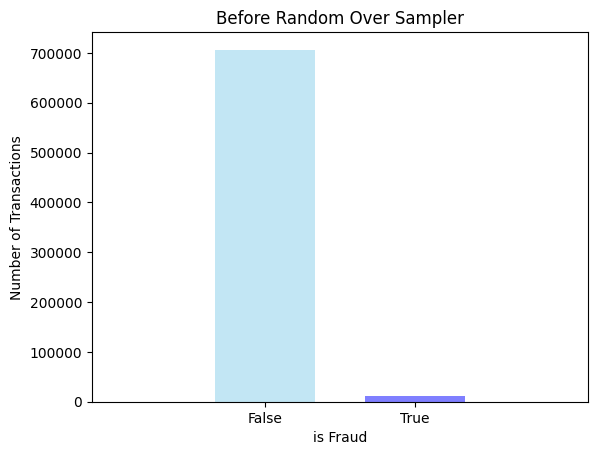

In [185]:
plt.hist([before_T, before_F], bins=2, color=['b', 'skyblue'], alpha=0.5)
plt.title('Before Random Over Sampler')
plt.xlabel('is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks([0.35, 0.65], ['False', 'True'])
plt.show()

In [342]:
y = np.array(Entiresample["customerId"]).reshape(-1,1)
X = np.array(Entiresample["isFraud"]).reshape(-1,1)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
len(X_resampled)
len(y_resampled)

In [ ]:
afterfore_T = X_resampled[X_resampled["isFraud"] == True]
afterfore_F = y_resampled[y_resampled["isFraud"] == False]     

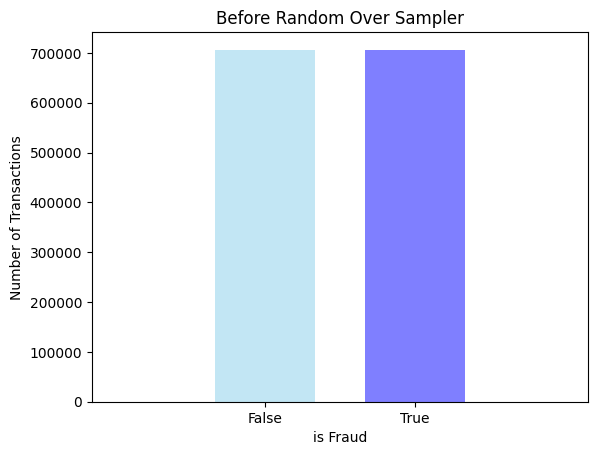

In [184]:
plt.hist([afterfore_T, afterfore_F], bins=2, color=['b', 'skyblue'], alpha=0.5)
plt.title('After Random Over Sampler')
plt.xlabel('is Fraud')
plt.ylabel('Number of Transactions')
plt.xticks([0.35, 0.65], ['False', 'True'])
plt.show()

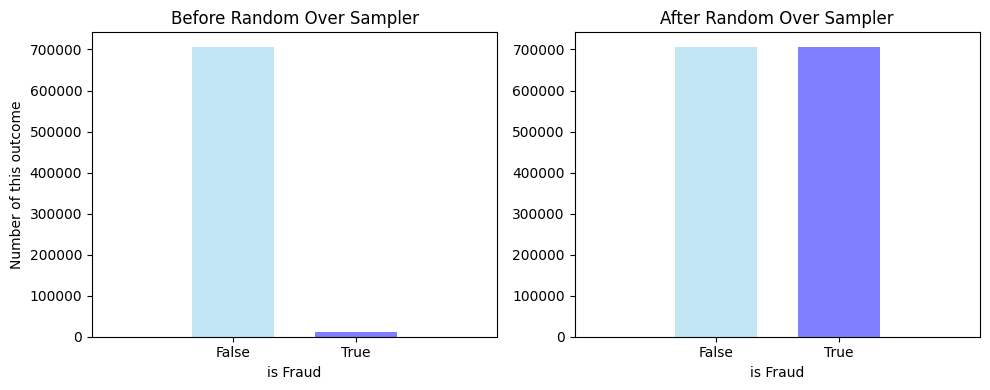

In [202]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax1.hist([before_T, before_F], bins=2, color=['b', 'skyblue'], alpha=0.5)
ax1.set_title('Before Random Over Sampler')
ax1.set_xlabel('is Fraud')
ax1.set_ylabel('Number of this outcome')
ax1.set_xticks([0.35, 0.65], ['False', 'True'])
ax2.hist([afterfore_T, afterfore_F], bins=2, color=['b', 'skyblue'], alpha=0.5)
plt.title('After Random Over Sampler')
plt.xlabel('is Fraud')
plt.ylabel('')
plt.xticks([0.35, 0.65], ['False', 'True'])
plt.tight_layout()
plt.show()